enter the number of variables: 20
Enter the initial population size: 10
Enter the minimum value of X: -500
Enter the maximum value of X: 500
Enter the max number of iterations: 100
[ 413.06892288 -500.          231.72662434  500.         -500.
 -310.2099178  -150.6917132   420.1861433  -500.          436.30484716
  500.          464.67560649  468.94412228   53.10553738  403.5532047
  489.2293489  -500.          412.07970671  500.          412.8545182 ]
[ -661.57852976 -1513.59155863 -1513.59155863 -1513.59155863
 -1731.31758253 -1731.31758253 -1731.31758253 -1731.31758253
 -1731.31758253 -1731.31758253 -1787.74140171 -1787.74140171
 -1787.74140171 -1787.74140171 -1787.74140171 -1787.74140171
 -2444.95515548 -2444.95515548 -2444.95515548 -2444.95515548
 -2444.95515548 -2444.95515548 -2444.95515548 -2444.95515548
 -2444.95515548 -2444.95515548 -2444.95515548 -2444.95515548
 -2444.95515548 -2444.95515548 -2444.95515548 -2444.95515548
 -2444.95515548 -2444.95515548 -2820.44091987 -3378.896

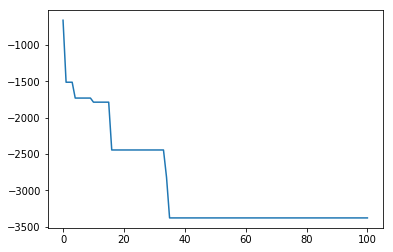

In [8]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
d=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(d,N,xmin,xmax):
    return ((np.random.rand(N,d))*(2*xmax))-xmax
pop=POP(d,N,xmin,xmax)
#intial setup
def cfun(a):
    l=0
    for value in a:
        o=(-value)*np.sin(np.sqrt(abs(value)))
        l+=o
    return l

def GBEST(pbest):
    cost=np.apply_along_axis(cfun,1,pbest)
    gbestcost=np.argmin(cost)
    return np.array([pbest[gbestcost,:]])
def setup(pop):
    cost=np.apply_along_axis(cfun,1,pop)
    pbest=np.copy(pop)
    v=np.zeros((N,d))
    gbest= GBEST(pbest)
    GBests=np.zeros((iterations+1,d))
    GBests[0]=gbest
    return cost, pbest, v, gbest, GBests
cost, pbest, v, gbest, GBests= setup(pop)
#updating v,x,pbest,gbest
for x in range(0,iterations):
    for i in range(0,N):
        for j in range(0,d):
            v[i,j]+=(2*(np.random.rand())*(pbest[i,j]-pop[i,j]))+(2*(np.random.rand())*(gbest[0,j]-pop[i,j]))
            z=pop[i,j]+v[i,j]
            if z<=xmin:
                pop[i,j]=xmin
            elif z>=xmax:
                pop[i,j]=xmax
            else:
                pop[i,j]=z
        if cfun(pop[i])<cfun(pbest[i]):
            pbest[i]=pop[i]
    gbest= GBEST(pbest)
    GBests[x+1]=gbest
print(GBests[-1,:])
GBestscost=np.apply_along_axis(cfun,1,np.array(GBests))
print(GBestscost)
plt.plot(GBestscost)
plt.show()